# Python 金融資料的處理應用

> Python 資料分析模組

[郭耀仁](https://hahow.in/@tonykuoyj?tr=tonykuoyj) | yaojenkuo@ntu.edu.tw | April 2024

## NumPy

## 什麼是 NumPy

> NumPy 是 Numeric Python 的簡稱，是 Python 最重要的資料科學模組之一。NumPy 創造了 `ndarray` 的資料結構類別以及大量的通用函數與聚合函數，讓 Python 使用者能夠對進行快速的數值計算、使用統計函數、進行線性代數運算以及操作隨機的模擬任務等。

來源：<https://numpy.org/>

## （沒什麼用的冷知識）NumPy 的前身為兩個模組

- 1990 年代中期誕生的` Numeric` 與 `Numarray` 模組。
- NumPy 於 2005 集兩者之大成問世。

來源：<https://www.nature.com/articles/s41586-020-2649-2>

## 根據說明文件的範例載入

來源：<https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-import-numpy>

In [1]:
import numpy as np

## 如果環境中沒有安裝 `numpy`，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'numpy'
```

## NumPy 的核心功能

1. 使用 `ndarray` 來進行數值操作。
2. 使用模組定義的函數對 `ndarray` 進行數值運算。
3. `ndarray` 是其他資料科學模組 Pandas、Matplotlib 與 Scikit-Learn 的基石。

## 從 `list` 創造 `ndarray`

In [2]:
prime_list = [2, 3, 5, 7, 11]
prime_array = np.array(prime_list)
print(prime_array)
print(type(prime_array))

[ 2  3  5  7 11]
<class 'numpy.ndarray'>


##  利用 NumPy 函數創造內容元素相同的 `ndarray`

- `np.zeros()`
- `np.ones()`
- `np.full()`

In [3]:
print(np.zeros(5, dtype=int))
print(np.ones(5, dtype=float))
print(np.full(5, 6))

[0 0 0 0 0]
[1. 1. 1. 1. 1.]
[6 6 6 6 6]


## 利用 NumPy 函數創造數列型態的 `ndarray`

- `np.arange(start, stop, step)`
- `np.linspace(start, stop, num)` 值得注意的是 `stop` 參數預設為包含。

In [4]:
print(np.arange(1, 11, 2))
print(np.linspace(1, 9, 5, dtype=int))

[1 3 5 7 9]
[1 3 5 7 9]


## 利用 `np.random` 中的函數創造隨機性的 `ndarray`

In [5]:
m = 10000
uniform_array = np.random.random(m) # module.function()
normal_array = np.random.normal(0, 1, m)
randint_array = np.random.randint(1, 7, size=m)
print(uniform_array)
print(normal_array)
print(randint_array)

[0.1952533  0.40258042 0.14737346 ... 0.62867906 0.36418401 0.17013949]
[ 0.15881748 -1.60656288 -0.43795067 ...  0.11110473  0.49469041
 -1.52568054]
[5 2 1 ... 5 4 3]


## 常用的 `ndarray` 屬性

- `ndarray.ndim` 維度數。
- `ndarray.shape` 外型。
- `ndarray.size` 元素個數。
- `ndarray.dtype` 資料類別。

In [6]:
prime_list = [2, 3, 5, 7, 11]
prime_array = np.array(prime_list)
print(prime_array.ndim)
print(prime_array.shape)
print(prime_array.size)
print(prime_array.dtype)

1
(5,)
5
int64


## `ndarray` 與 `list` 相異的地方

- indexing 二維以上的 `ndarray` 可以用更便捷的語法 `[i, j, k, ...]`
- 同質性資料結構類別。
- 支援元素操作（Elementwise）運算。
- 支援特殊的 indexing 語法。

## indexing 二維以上的 `ndarray` 可以用 `ndarray` 便捷的語法 `[i, j, k, ...]`

In [7]:
matrix = np.array([[5, 5],
                   [6, 6],
                   [55, 66]])
print(matrix)
print(matrix[2, 1]) # 66 locates at [2, 1]

[[ 5  5]
 [ 6  6]
 [55 66]]
66


In [8]:
print(matrix[:, 1])
print(matrix[:, [1]]) # keep dimension

[ 5  6 66]
[[ 5]
 [ 6]
 [66]]


## 同質性資料結構類別

In [9]:
heterogeneous_list = [False, True, 5566, 55.66, 'Luke Skywalker']
for element in heterogeneous_list:
    print(type(element))

<class 'bool'>
<class 'bool'>
<class 'int'>
<class 'float'>
<class 'str'>


In [10]:
homogeneous_array = np.array(heterogeneous_list)
for element in homogeneous_array:
    print(type(element))

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>


## 支援元素操作（Elementwise）運算

In [11]:
# list does not support elementwise
primes_list = [2, 3, 5, 7, 11]
try:
    primes_list**2
except TypeError as error_message:
    print(error_message)

unsupported operand type(s) for ** or pow(): 'list' and 'int'


In [12]:
# ndarray supports elementwise
primes_array = np.array(primes_list)
primes_array**2

array([  4,   9,  25,  49, 121])

## 支援特殊的 indexing 語法

- Fancy indexing
- Boolean indexing

## 什麼是 Fancy indexing

對應 `ndarray` 時中括號允許傳入 `list`，藉此可以更有彈性地取出 `ndarray` 中的元素。

In [13]:
primes_list = [2, 3, 5, 7, 11]
try:
    primes_list[[0, 1, 4]]
except TypeError as error_message:
    print(error_message)

list indices must be integers or slices, not list


In [14]:
primes_array = np.array([2, 3, 5, 7, 11])
print(primes_array)
print(primes_array[[0, 1, 4]])

[ 2  3  5  7 11]
[ 2  3 11]


## 什麼是 Boolean indexing

對應 `ndarray` 時中括號允許傳入由 `bool` 組成的相同長度 `list` 或 `ndarray`，藉此可以更有彈性地取出 `ndarray` 中的元素。

In [15]:
primes_list = [2, 3, 5, 7, 11]
try:
    primes_list[[False, True, True, True, True]]
except TypeError as error_message:
    print(error_message)

list indices must be integers or slices, not list


In [16]:
primes_array = np.array([2, 3, 5, 7, 11])
print(primes_array)
print(primes_array[[False, True, True, True, True]])
print(primes_array % 2 == 1)
print(primes_array[primes_array % 2 == 1])

[ 2  3  5  7 11]
[ 3  5  7 11]
[False  True  True  True  True]
[ 3  5  7 11]


## NumPy 提供非常豐富的數值運算函數

- 通用函數（Universal functions）。
- 聚合函數（Aggregate functions）。

## 什麼是通用函數

通用函數是具備向量化（Vectorized）特性的函數，接受固定數量、外型的輸入並對應相同數量、外型的輸出。

In [17]:
array_range = np.arange(10)
print(array_range)
print(np.power(array_range, 2)) # np.power() is a universal function
print(np.exp(array_range))      # np.exp() is a universal function

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


## 轉換純量函數為通用函數

使用 `np.vectorize()` 函數將只能作用在單一資料值上的函數轉換為通用函數。

In [18]:
def is_prime(x):
    number_of_divisors = 0
    for integer in range(1, x + 1):
        if x % integer == 0:
            number_of_divisors += 1
    return number_of_divisors == 2

try:
    is_prime(np.arange(10))
except TypeError as error_message:
    print(error_message)

only integer scalar arrays can be converted to a scalar index


In [19]:
vectorized_is_prime = np.vectorize(is_prime)
vectorized_is_prime(np.arange(10))

array([False, False,  True,  True, False,  True, False,  True, False,
       False])

## 什麼是聚合函數

聚合函數是能夠將多個資料值輸入摘要為單一值輸出的函數。

In [20]:
array_range = np.arange(1, 16).reshape(3, 5)
np.sum(array_range)

120

## NumPy 的聚合函數有兩個值得注意的特性

1. 可以沿指定的軸（axis）進行聚合。
2. 針對含有 `np.nan`（Not a Number）的 `ndarray` 有相對應名稱的聚合函數可以運算。

In [21]:
# Aggregate along specific axis
array_range = np.arange(1, 16, dtype=float).reshape(3, 5)
print(np.sum(array_range))
print(np.sum(array_range, axis=0))
print(np.sum(array_range, axis=1))

120.0
[18. 21. 24. 27. 30.]
[15. 40. 65.]


## 針對含有 `np.nan` 的 `ndarray` 有相對應名稱的聚合函數可以運算

- `np.sum()` vs. `np.nansum()`
- `np.mean()` vs. `np.nanmean()`
- ...等。

In [22]:
# Similar function names for array with np.nan
array_range = np.arange(1, 16, dtype=float).reshape(3, 5)
array_range[2, 4] = np.nan
print(array_range)
print(np.sum(array_range))
print(np.nansum(array_range))

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. nan]]
nan
105.0


## Pandas

## 什麼是 Pandas

> Pandas 是 Python 處理表格式資料（Tabular data）的第三方模組，它創造了 `Index`、`Series` 與 `DataFrame` 的資料結構類別，讓 Python 在面對表格式資料時能夠用更直覺的觀念操作。

來源：<https://github.com/pandas-dev/pandas>

## （沒什麼用的冷知識）Pandas 跟熊貓「沒有關係」

1. **Pan**el(自從版本 0.20.0 之後棄用)
2. **Da**taFrame
3. **S**eries

![](https://media.giphy.com/media/46Zj6ze2Z2t4k/giphy.gif)

來源：<https://media.giphy.com/media/46Zj6ze2Z2t4k/giphy.gif>

## 根據說明文件的範例載入

來源：<https://pandas.pydata.org/docs/user_guide/10min.html>

In [23]:
import pandas as pd

## 如果環境中沒有安裝 Pandas，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'pandas'
```

## 入門 Pandas 的第一步就是掌握 `Index`、`ndarray`、`Series` 與 `DataFrame` 四個資料結構類別彼此之間的關係

- `Series` 由 `Index` 與 `ndarray` 組合而成。
- `DataFrame` 由數個共享同一個 `Index` 的 `Series` 組合而成。

## Pandas 的 `Index` 類別

使用 `pd.Index()` 函數創造 `Index` 類別的實例。

In [24]:
import numpy as np

In [25]:
primes_array = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])
prime_indexes = pd.Index(primes_array)
print(prime_indexes)
print(type(prime_indexes))

Index([2, 3, 5, 7, 11, 13, 17, 19, 23, 29], dtype='int64')
<class 'pandas.core.indexes.base.Index'>


## `Index` 的基礎屬性

- `Index.dtype` 資料類別。
- `Index.size` 元素個數。

In [26]:
print(prime_indexes.dtype)
print(prime_indexes.size)

int64
10


## `Index` 類別結合 Python 內建的 `tuple` 與 `set` 兩種資料結構類別的特性

- 具有 `tuple` 無法更動的特性。
- 具有 `set` 集合運算的特性。 

## `Index` 類別具有 `tuple` 無法更動的特性

In [27]:
# Index has the characteristics of a tuple
primes_array = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])
prime_indexes = pd.Index(primes_array)
try:
    prime_indexes[-1] = 31
except TypeError as error_message:
    print(error_message)

Index does not support mutable operations


## `Index` 類別具有 `set` 集合運算的特性

In [28]:
# Index has the characteristics of a set
primes_array = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])
prime_indexes = pd.Index(primes_array)
odd_indexes = pd.Index(np.arange(1, 30, 2))
print(prime_indexes)
print(odd_indexes)

Index([2, 3, 5, 7, 11, 13, 17, 19, 23, 29], dtype='int64')
Index([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], dtype='int64')


## `Index` 具有與 `set` 同樣名稱的集合運算方法

- `Index.intersection()` 交集。
- `Index.union()` 聯集。
- `Index.difference()` 差集。
- `Index.symmetric_difference()` 對稱差集。

In [29]:
# Set operations of Index
print(prime_indexes.intersection(odd_indexes))
print(prime_indexes.union(odd_indexes))
print(prime_indexes.difference(odd_indexes))
print(odd_indexes.difference(prime_indexes))
print(prime_indexes.symmetric_difference(odd_indexes))

Index([3, 5, 7, 11, 13, 17, 19, 23, 29], dtype='int64')
Index([1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], dtype='int64')
Index([2], dtype='int64')
Index([1, 9, 15, 21, 25, 27], dtype='int64')
Index([1, 2, 9, 15, 21, 25, 27], dtype='int64')


## Pandas 的 `Series` 類別

使用 `pd.Series()` 函數創造 `Series` 類別的實例。

In [30]:
months_array = np.arange(1, 13)
months_series = pd.Series(months_array)
print(months_series)
print(type(months_series))

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
dtype: int64
<class 'pandas.core.series.Series'>


## `Series` 的基礎屬性與方法

- `Series.dtype` 資料類別。
- `Series.size` 元素個數。
- `Series.index` 取出 `Series` 的 `Index` 部分。  
- `Series.values` 取出 `Series` 的 `ndarray` 部分。
- `Series.astype()` 轉換 `Series` 的資料類別。

In [31]:
print(months_series.dtype)
print(months_series.size)

int64
12


## `Series` 由 `Index` 與 `ndarray` 組合而成

In [32]:
print(months_series.index)
print(type(months_series.index))

RangeIndex(start=0, stop=12, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [33]:
print(months_series.values)
print(type(months_series.values))

[ 1  2  3  4  5  6  7  8  9 10 11 12]
<class 'numpy.ndarray'>


## 調整 `Series` 的 `Index`

- 在建立的時候指定。
- 透過 `Series.index` 更新。

## 在建立的時候指定

In [34]:
months_abbreviation = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
months_series = pd.Series(months_array, index=months_abbreviation)
months_series

JAN     1
FEB     2
MAR     3
APR     4
MAY     5
JUN     6
JUL     7
AUG     8
SEP     9
OCT    10
NOV    11
DEC    12
dtype: int64

## 透過 `Series.index` 更新

In [35]:
months_abbreviation = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
months_series = pd.Series(months_array)
months_series.index = months_abbreviation
months_series

JAN     1
FEB     2
MAR     3
APR     4
MAY     5
JUN     6
JUL     7
AUG     8
SEP     9
OCT    10
NOV    11
DEC    12
dtype: int64

## 如何取出 `Series` 中的元素

- 以元素位置 indexing/slicing
- 以 `Index` indexing/slicing

## 以元素位置 indexing/slicing

In [36]:
print(months_series[0])
print(months_series[:3])

1
JAN    1
FEB    2
MAR    3
dtype: int64


## 以 `Index` indexing/slicing

In [37]:
print(months_series["JAN"])
print(months_series["JAN":"MAR"])

1
JAN    1
FEB    2
MAR    3
dtype: int64


## 轉換 `Series` 的資料類別

- 在建立的時候指定。
- 透過 `Series.astype()` 轉換 `Series` 的資料類別。

## 在建立的時候指定

In [38]:
months_series = pd.Series(months_array, dtype=float)
months_series

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
dtype: float64

## `Series.astype()` 轉換 `Series` 的資料類別

In [39]:
months_series = pd.Series(months_array)
print(months_series.dtype)
print(months_series.astype(float))

int64
0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
dtype: float64


## Pandas 的 `DataFrame` 類別

使用 `pd.DataFrame()` 函數創造 `DataFrame` 類別的實例。

- 輸入以欄為基準（Column-based）的資料內容。
- 輸入以列為基準（Row-based）的資料內容。

## 輸入以欄為基準（Column-based）的資料內容

In [40]:
movie_df = pd.DataFrame()
movie_df["title"] = ["The Shawshank Redemption", "The Dark Knight", "Schindler's List", "Forrest Gump", "Inception"]
movie_df["imdb_rating"] = [9.3, 9.0, 8.9, 8.8, 8.7]
movie_df["release_year"] = [1994, 2008, 1993, 1994, 2010]
print(movie_df)
print(type(movie_df))

                      title  imdb_rating  release_year
0  The Shawshank Redemption          9.3          1994
1           The Dark Knight          9.0          2008
2          Schindler's List          8.9          1993
3              Forrest Gump          8.8          1994
4                 Inception          8.7          2010
<class 'pandas.core.frame.DataFrame'>


## 輸入以列為基準（Row-based）的資料內容

In [41]:
movies = [
    {"title": "The Shawshank Redemption", "imdb_rating": 9.3, "release_year": 1994},
    {"title": "The Dark Knight", "imdb_rating": 9.0, "release_year": 2008},
    {"title": "Schindler's List", "imdb_rating": 8.9, "release_year": 1993},
    {"title": "Forrest Gump", "imdb_rating": 8.8, "release_year": 1994},
    {"title": "Inception", "imdb_rating": 8.7, "release_year": 2010},
]
movie_df = pd.DataFrame(movies)
print(movie_df)
print(type(movie_df))

                      title  imdb_rating  release_year
0  The Shawshank Redemption          9.3          1994
1           The Dark Knight          9.0          2008
2          Schindler's List          8.9          1993
3              Forrest Gump          8.8          1994
4                 Inception          8.7          2010
<class 'pandas.core.frame.DataFrame'>


## Jupyter Notebook 針對 `DataFrame` 類別有特別的顯示外觀

In [42]:
movie_df

,title,imdb_rating,release_year
0,The Shawshank Redemption,9.3,1994
1,The Dark Knight,9.0,2008
2,Schindler's List,8.9,1993
3,Forrest Gump,8.8,1994
4,Inception,8.7,2010


## `DataFrame` 的基礎屬性

- `DataFrame.dtypes` 資料類別。
- `DataFrame.shape` 外型。
- `DataFrame.index` 取出列標籤（row labels）部分。  
- `DataFrame.columns` 取出欄標籤（column labels）的部分。

In [43]:
print(movie_df.dtypes)
print(movie_df.shape)
print(movie_df.index)
print(movie_df.columns)

title            object
imdb_rating     float64
release_year      int64
dtype: object
(5, 3)
RangeIndex(start=0, stop=5, step=1)
Index(['title', 'imdb_rating', 'release_year'], dtype='object')


## `DataFrame` 由數個 `Series` 共享同一個 `Index` 組成

In [44]:
print(type(movie_df.index))
print(type(movie_df["title"]))
print(type(movie_df["imdb_rating"]))
print(type(movie_df["release_year"]))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## `DataFrame` 的基礎方法

- `DataFrame.head(n)` 檢視前 `n` 列。
- `DataFrame.tail(n)` 檢視後 `n` 列。
- `DataFrame.describe()`  檢視數值欄位的描述性統計。
- `DataFrame.info()` 檢視詳細資訊。

## 檢視前 `n` 列、後 `n` 列

- `DataFrame.head(n)` 檢視前 `n` 列。
- `DataFrame.tail(n)` 檢視後 `n` 列。

In [45]:
movie_df.head(3)

,title,imdb_rating,release_year
0,The Shawshank Redemption,9.3,1994
1,The Dark Knight,9.0,2008
2,Schindler's List,8.9,1993


In [46]:
movie_df.tail(2)

,title,imdb_rating,release_year
3,Forrest Gump,8.8,1994
4,Inception,8.7,2010


## `DataFrame.describe()` 檢視數值欄位的描述性統計

In [47]:
movie_df.describe()

,imdb_rating,release_year
count,5.000000,5.000000
mean,8.940000,1999.800000
std,0.230217,8.438009
min,8.700000,1993.000000
25%,8.800000,1994.000000
50%,8.900000,1994.000000
75%,9.000000,2008.000000
max,9.300000,2010.000000


## `DataFrame.info()` 檢視詳細資訊

In [48]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5 non-null      object 
 1   imdb_rating   5 non-null      float64
 2   release_year  5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 252.0+ bytes


## Matplotlib

## 什麼是 Matplotlib

> Matplotlib 是 Python 資料視覺化的第三方模組。

來源：<https://matplotlib.org>

## （沒什麼用的冷知識）Matplotlib 與 Matlab 有一點關係

- Matrix plotting library.
- 模仿 Matlab 作圖的指令與功能。

來源：<https://matplotlib.org/stable/users/project/history.html>

## 根據說明文件的範例載入

實際上主要在使用的是 `matplotlib.pyplot`

來源：<https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py>

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## 如果環境中沒有安裝 Matplotlib，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'matplotlib'
```

## 新手學習 Matplotlib 的最大挑戰：兩種不同的作圖語法

1. Matlab 風格。
2. 物件導向風格。

## Matlab 風格

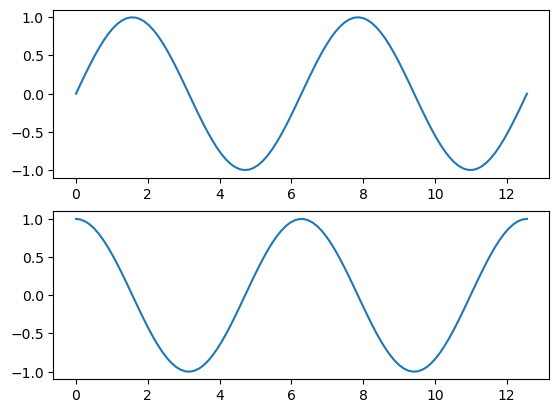

In [50]:
x = np.linspace(0, np.pi*4, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.show()

## Matlab 風格的優缺點

- 優點：指令式語法，比較直觀。
- 缺點：狀態型介面，需要依程式碼順序閱讀才能理解。

## 物件導向風格

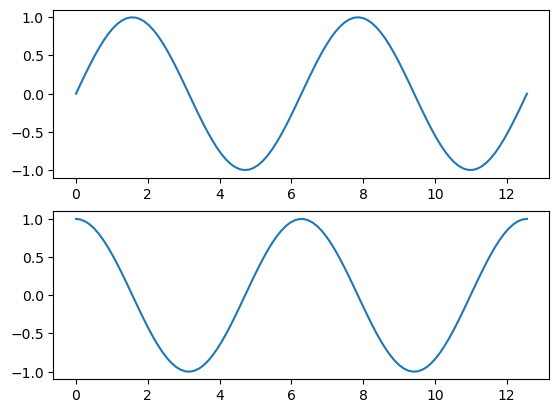

In [51]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
plt.show()

## 物件導向風格的優缺點

- 優點：物件型介面，不需要依程式碼順序閱讀也能理解。
- 缺點：對不熟悉物件導向概念的人不友善。

## 視覺化的標準五步驟

1. 建立 `ndarray`
2. 建立「畫布物件」與「軸物件」。
3. 使用「軸物件」的作圖方法建立主要圖形。
4. 使用「軸物件」的作圖方法添加圖形元素。
5. 顯示或者儲存圖形。

## 建立 `ndarray`

In [52]:
x = np.linspace(0, np.pi*2, 100)
sinx = np.sin(x)

## 建立「畫布物件」與「軸物件」

使用 `plt.subplots()` 函數。

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


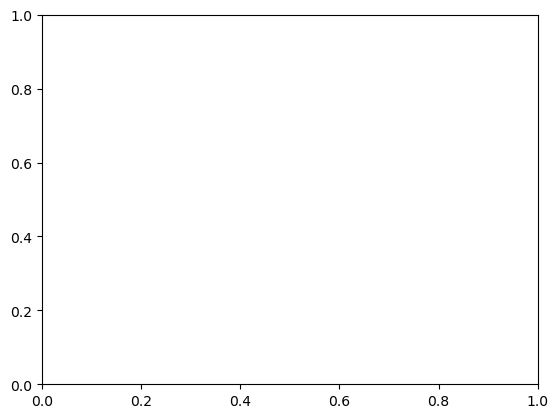

In [53]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

## 使用「軸物件」的作圖方法建立主要圖形

`AxesSubplot.plot()` 能夠建立線圖。

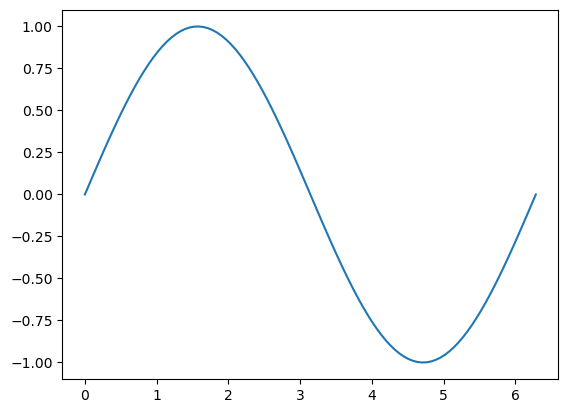

In [54]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)

## 使用「軸物件」的作圖方法添加圖形元素

(-5.0, 5.0)

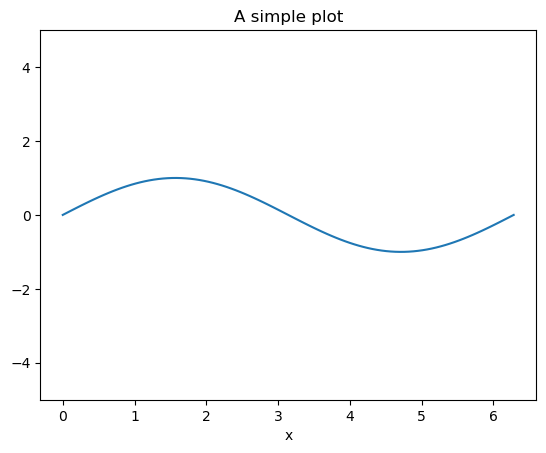

In [55]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('A simple plot')
ax.set_xlabel('x')
ax.set_ylim(-5, 5)

## 顯示圖形

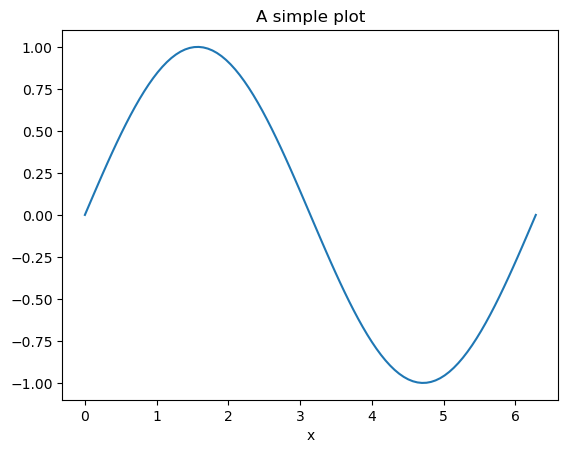

In [56]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('A simple plot')
ax.set_xlabel('x')
plt.show()

## 儲存圖形：可支援的圖片格式

In [57]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

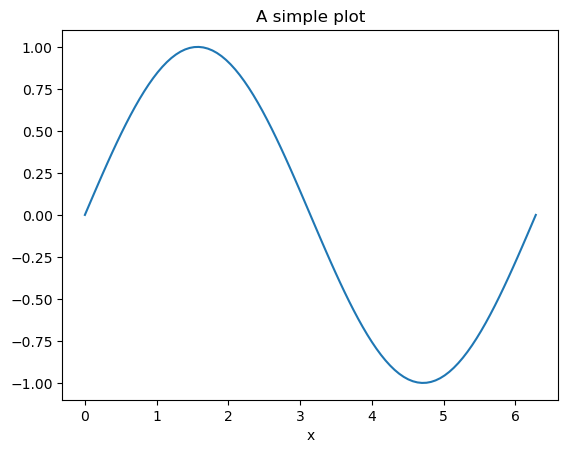

In [58]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x, sinx)
axes.set_title('A simple plot')
axes.set_xlabel('x')
fig.savefig('a_simple_plot.png')